In [1]:
# SET DATASET NAME
ds_name = 'Genentech//WB_GDC-0919_vs_Vehicle_tumor_zoom_08042015_dosed'

# model param : tfidf or lsi or corpus
model = "corpus"
# quantile param
q = 95.

import os
# base dir
base_dir = '/home/katya/Projects/Metabol'

import sys  
sys.path.append(base_dir)

c_file = os.path.join(base_dir,'corpora/pixel_'+model+'.mm')

pix_ann_dir = os.path.join(base_dir,'pixel-annotations/45_selected/')

sf_file = os.path.join(pix_ann_dir,'sf_df.msgpack')
dp_file = os.path.join(pix_ann_dir,'ds_pix_cord.msgpack')
dsf_file = os.path.join(pix_ann_dir,'ds_ion_int.msgpack')

import pandas as pd
dp_iterator = pd.read_msgpack(dp_file, iterator = True)
pixel_ids = []
for name, df in dp_iterator:
    if name == ds_name:
        for ir in df.itertuples():
            pixel_ids.append(ir[0])
        break
        
import gensim
from gensim import corpora

pixel_corpus = gensim.corpora.MmCorpus(c_file)

print("Number of pixels in dataset = %d" % (len(pixel_ids)))
ion_counter = 0
ion_idx = {}
ion_corpus = []
for pid in pixel_ids:
    for (sf,val) in pixel_corpus[pid]:
        if not sf in ion_idx: 
            ion_idx[sf] = ion_counter
            ion_corpus.append([])
            ion_counter+=1
        ion_corpus[ion_idx[sf]].append((pid,val))
print("Ion corpus generated")

/usr/local/lib/python3.5/dist-packages/gensim/utils.py:1015: UserWarning: Pattern library is not installed, lemmatization won't be available.
  warnings.warn("Pattern library is not installed, lemmatization won't be available.")


Number of pixels in dataset = 27666
Ion corpus generated


In [3]:
from gensim import similarities
from gensim.similarities import MatrixSimilarity, SparseMatrixSimilarity, Similarity
from gensim import models

#tfidf_model = gensim.models.TfidfModel(ion_corpus)
#tfidf_corpus = tfidf_model[ion_corpus]
sim_index = gensim.similarities.docsim.MatrixSimilarity(ion_corpus)

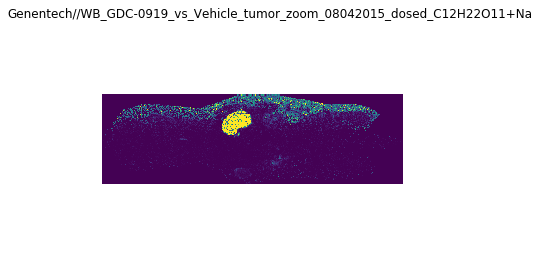

In [4]:
# SET SUMFORMULA NAME, ADDUCT
sf_name = 'C12H22O11'
add_name = '+Na'

import select_region
from select_region import sfname2index, draw_dataset_ion

ion_id = sfname2index(sf_file, sf_name, add_name)

#draw_dataset_ion(dsf_file, dp_file, ds_name, ion_id, sf_name+add_name, q, None)

In [12]:
sim_matrix = sim_index[ion_corpus[ion_idx[ion_id[0]]]]

counter = 0
ion_sim = []

ion_df = pd.read_msgpack(sf_file)
for index, row in ion_df.iterrows():
    if index in ion_idx:
        ion_sim.append((index,row.sf+row.adduct,sim_matrix[ion_idx[index]]))
ion_sim.sort(key=lambda x: x[2],reverse=True)


C12H22O11 +Na: 1.000000


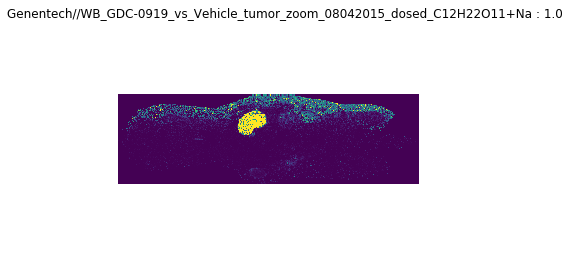

C13H14O8 +H: 0.802442


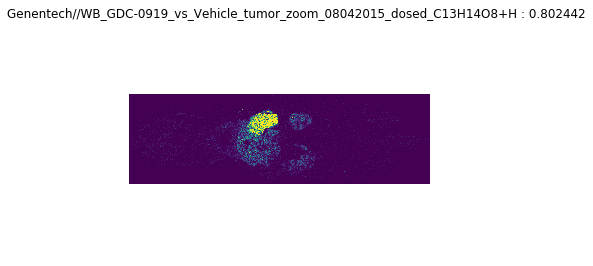

C15H18O10 +Na: 0.792038


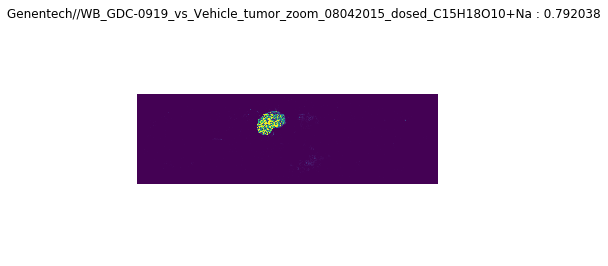

C17H18FN3O3S +H: 0.781967


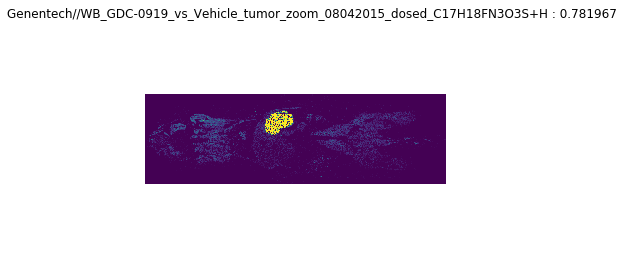

C15H10O4 +H: 0.763478


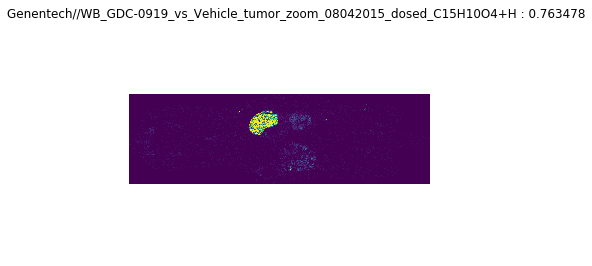

C7H14N2O6S +H: 0.761567


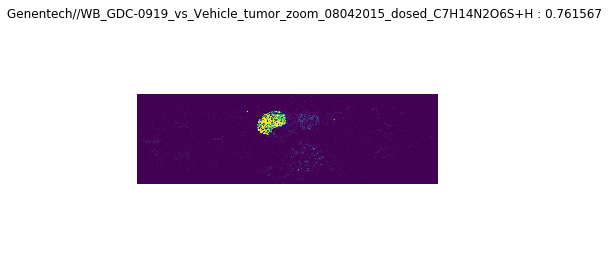

C18H32O16 +Na: 0.756705


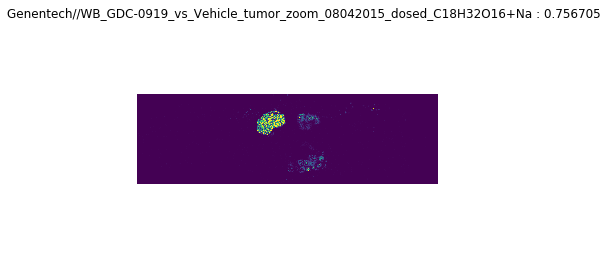

C21H20O9 +H: 0.711546


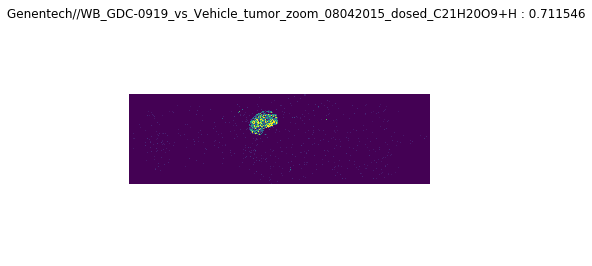

C21H20O10 +H: 0.710859


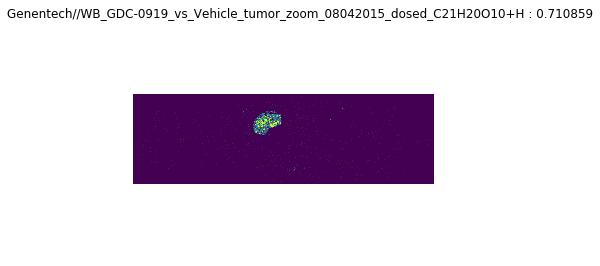

C14H18N2O5 +H: 0.709223


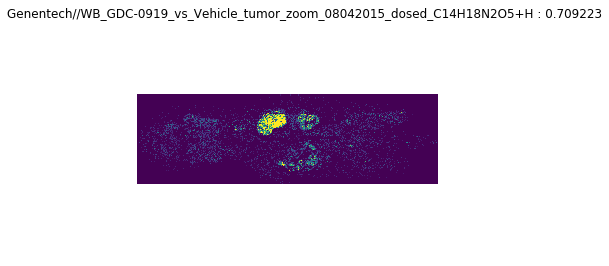

In [13]:
# NUMBER OF MOST SIMILAR IONS
n = 10

for (ion_id,ion_name, value) in ion_sim:
    if counter == n: break
    counter+=1
    print('%s %s: %f' % (ion_df.at[ion_id,'sf'], ion_df.at[ion_id,'adduct'], value))
    draw_dataset_ion(dsf_file, dp_file, ds_name, ion_id, ion_df.at[ion_id,'sf']+ion_df.at[ion_id,'adduct']+' : '+str(value), q, None)